In [14]:
!pip install xgboost -q
!pip install seaborn -q
import pandas as pd
import numpy as np
import xgboost as xgb
import os

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rajyellow46/wine-quality")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/wine-quality


In [15]:
import pandas as pd

caminho_csv = os.path.join(path, "winequalityN.csv")
df = pd.read_csv(caminho_csv)

df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [16]:
df['Vinho_bom'] = (df['quality'] >= 6).astype(int)

print(df['Vinho_bom'].value_counts(normalize=True))

Vinho_bom
1    0.633061
0    0.366939
Name: proportion, dtype: float64


In [17]:
X = df.drop(columns=['quality', 'Vinho_bom', 'type'])

y = df['Vinho_bom']
X_treino, X_teste, y_treino, y_teste = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [18]:
modelo = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)

modelo.fit(X_treino, y_treino)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72       477
           1       0.83      0.86      0.85       823

    accuracy                           0.80      1300
   macro avg       0.79      0.78      0.78      1300
weighted avg       0.80      0.80      0.80      1300

Acurácia: 0.802


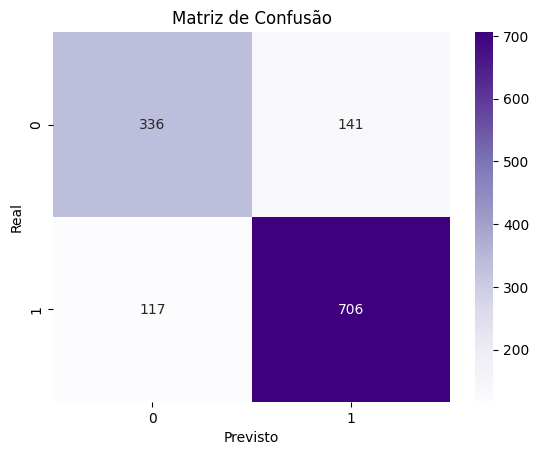

In [19]:
y_predito = modelo.predict(X_teste)

print("Relatório de Classificação:\n", classification_report(y_teste, y_predito))
print(f"Acurácia: {accuracy_score(y_teste, y_predito):.3f}")

matriz = confusion_matrix(y_teste, y_predito)
sns.heatmap(matriz, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()


/tmp/ipython-input-20-94549562.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quality', data=df, palette='viridis')


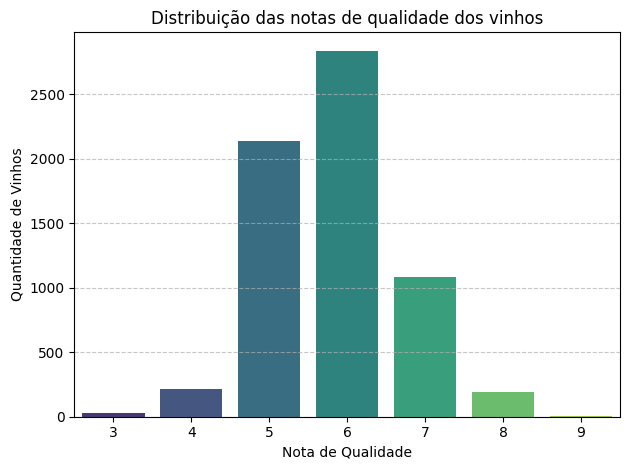

In [20]:
sns.countplot(x='quality', data=df, palette='viridis')
plt.title('Distribuição das notas de qualidade dos vinhos')
plt.xlabel('Nota de Qualidade')
plt.ylabel('Quantidade de Vinhos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


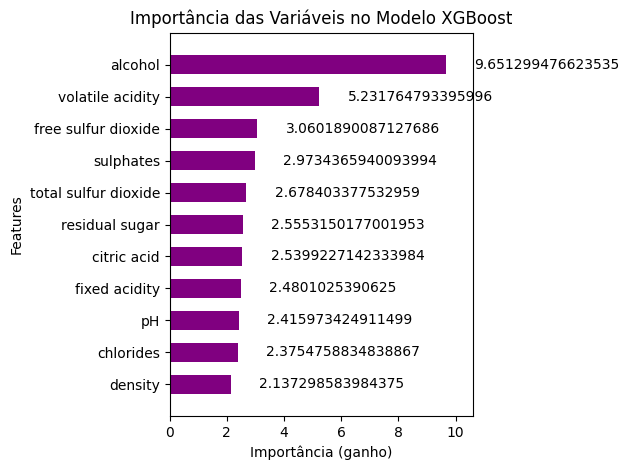

In [21]:
xgb.plot_importance(modelo,
                    importance_type='gain',
                    xlabel='Importância (ganho)',
                    grid=False,
                    height=0.6,
                    color='purple')
plt.title('Importância das Variáveis no Modelo XGBoost')
plt.tight_layout()
plt.show()